In [1]:
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
from typing_extensions import dataclass_transform
from google.colab import files

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

In [3]:
"""
DataFrame structure for the program
Columns:
Label( 0-Neutral(non-hate); 1-Hate )
Tweets
Tweet_P (Tweet after preprocessing)

"""

'\nDataFrame structure for the program\nColumns:\nLabel( 0-Neutral(non-hate); 1-Hate )\nTweets\nTweet_P (Tweet after preprocessing)\n\n'

In [4]:
Data_1 = pd.read_csv('/content/DataP_1.csv')
Data_2 = pd.read_csv('/content/DataP_2.csv')
Data_3 = pd.read_csv('/content/DataP_3.csv')
Data_R = pd.read_csv('/content/DataP_R.csv')
Data_1 = Data_1.dropna()
Data_2 = Data_2.dropna()
Data_3 = Data_3.dropna()
Data_R = Data_R.dropna()

In [5]:
#Splitting data into train-test
vectorizer_1 = TfidfVectorizer()
T1 = vectorizer_1.fit_transform(Data_1['Tweet_P'])

joblib.dump(vectorizer_1, 'tfidf_vectorizer_1.pkl')

L1 = Data_1['Label']
T1_train, T1_test, L1_train, L1_test = train_test_split(T1, L1, test_size=0.2, random_state=42)
print(T1_train.shape, T1_test.shape, L1_train.shape, L1_test.shape)

(19826, 29983) (4957, 29983) (19826,) (4957,)


In [6]:
T2 = Data_2['Tweet_P']
L2 = Data_2['Label']
T2_train, T2_test, L2_train, L2_test = train_test_split(T2, L2, test_size=0.5, random_state=42)
print(T2_train.shape, T2_test.shape, L2_train.shape, L2_test.shape)

(20311,) (20311,) (20311,) (20311,)


In [7]:
T3 = Data_3['Tweet_P']
L3 = Data_3['Label']
T3_train, T3_test, L3_train, L3_test = train_test_split(T3, L3, test_size=0.5, random_state=42)
print(T3_train.shape, T3_test.shape, L3_train.shape, L3_test.shape)

(6953,) (6954,) (6953,) (6954,)


In [8]:
TR = Data_R['Tweet_P']
LR = Data_R['Label']
TR_train, TR_test, LR_train, LR_test = train_test_split(TR, LR, test_size=0.5, random_state=42)
print(TR_train.shape, TR_test.shape, LR_train.shape, LR_test.shape)

(15977,) (15977,) (15977,) (15977,)


In [9]:
"""
Using Logistic regression model
Model is fit on one data source & check accuracy for different data sources
"""

'\nUsing Logistic regression model\nModel is fit on one data source & check accuracy for different data sources\n'

In [10]:
#Logistic Regression Model
model_1 = LogisticRegression()
model_1.fit(T1_train, L1_train)

LogisticRegression()

In [11]:
joblib.dump(model_1, 'logistic_regression_model_1.pkl')

['logistic_regression_model_1.pkl']

In [12]:
#Download vectorizer_1 & model_1
files.download('tfidf_vectorizer_1.pkl')
files.download('logistic_regression_model_1.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
model_1 = joblib.load('logistic_regression_model_1.pkl')

In [14]:
#Model trained on Data Source 1 & Tested on Data Source 1

In [15]:
L1_predicted = model_1.predict(T1_test)
print("Model trained on Data Source 1 & Tested on Data Source 1")
print("Accuracy Score 1: \n", accuracy_score(L1_test, L1_predicted))
print("Confusion Matrix: \n", confusion_matrix(L1_test, L1_predicted))
print("Classification Report: \n", classification_report(L1_test, L1_predicted))

Model trained on Data Source 1 & Tested on Data Source 1
Accuracy Score 1: 
 0.9352430905789793
Confusion Matrix: 
 [[ 599  236]
 [  85 4037]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.72      0.79       835
           1       0.94      0.98      0.96      4122

    accuracy                           0.94      4957
   macro avg       0.91      0.85      0.88      4957
weighted avg       0.93      0.94      0.93      4957



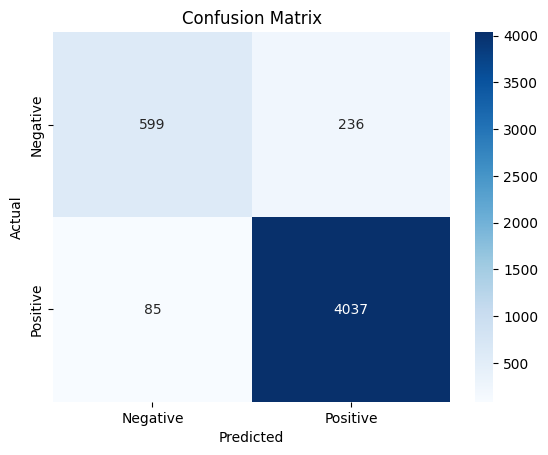

In [16]:
sns.heatmap(confusion_matrix(L1_test, L1_predicted), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [17]:
#Model trained on Data Source 1 & Tested on Data Source 2

In [18]:
vectorizer_1 = joblib.load('tfidf_vectorizer_1.pkl')
T2_test = vectorizer_1.transform(T2_test)
model_1 = joblib.load('logistic_regression_model_1.pkl')
L2_predicted = model_1.predict(T2_test)
print("Model trained on Data Source 1 & Tested on Data Source 2")
print("Accuracy Score 1: \n", accuracy_score(L2_test, L2_predicted))
print("Confusion Matrix: \n", confusion_matrix(L2_test, L2_predicted))
print("Classification Report: \n", classification_report(L2_test, L2_predicted))

Model trained on Data Source 1 & Tested on Data Source 2
Accuracy Score 1: 
 0.5409876421643445
Confusion Matrix: 
 [[  412  8859]
 [  464 10576]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.47      0.04      0.08      9271
           1       0.54      0.96      0.69     11040

    accuracy                           0.54     20311
   macro avg       0.51      0.50      0.39     20311
weighted avg       0.51      0.54      0.41     20311



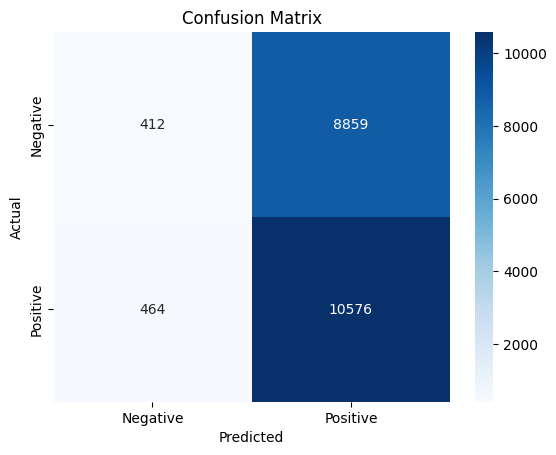

In [19]:
sns.heatmap(confusion_matrix(L2_test, L2_predicted), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [20]:
#Model trained on Data Source 1 & Tested on Data Source 3

In [21]:
vectorizer_1 = joblib.load('tfidf_vectorizer_1.pkl')
T3_test = vectorizer_1.transform(T3_test)
model_1 = joblib.load('logistic_regression_model_1.pkl')
L3_predicted = model_1.predict(T3_test)
print("Model trained on Data Source 1 & Tested on Data Source 3")
print("Accuracy Score 1: \n", accuracy_score(L3_test, L3_predicted))
print("Confusion Matrix: \n", confusion_matrix(L3_test, L3_predicted))
print("Classification Report: \n", classification_report(L3_test, L3_predicted))

Model trained on Data Source 1 & Tested on Data Source 3
Accuracy Score 1: 
 0.4926660914581536
Confusion Matrix: 
 [[  86 3381]
 [ 147 3340]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.37      0.02      0.05      3467
           1       0.50      0.96      0.65      3487

    accuracy                           0.49      6954
   macro avg       0.43      0.49      0.35      6954
weighted avg       0.43      0.49      0.35      6954



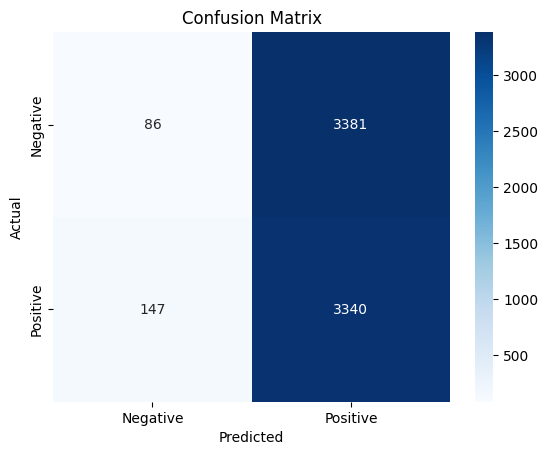

In [22]:
sns.heatmap(confusion_matrix(L3_test, L3_predicted), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [23]:
#Model trained on Data Source 1 & Tested on Data Source R

In [24]:
vectorizer_1 = joblib.load('tfidf_vectorizer_1.pkl')
TR_test = vectorizer_1.transform(TR_test)
model_1 = joblib.load('logistic_regression_model_1.pkl')
LR_predicted = model_1.predict(TR_test)
print("Model trained on Data Source 1 & Tested on Data Source R")
print("Accuracy Score 1: \n", accuracy_score(LR_test, LR_predicted))
print("Confusion Matrix: \n", confusion_matrix(LR_test, LR_predicted))
print("Classification Report: \n", classification_report(LR_test, LR_predicted))

Model trained on Data Source 1 & Tested on Data Source R
Accuracy Score 1: 
 0.17550228453401764
Confusion Matrix: 
 [[ 1776 13113]
 [   60  1028]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.12      0.21     14889
           1       0.07      0.94      0.14      1088

    accuracy                           0.18     15977
   macro avg       0.52      0.53      0.17     15977
weighted avg       0.91      0.18      0.21     15977



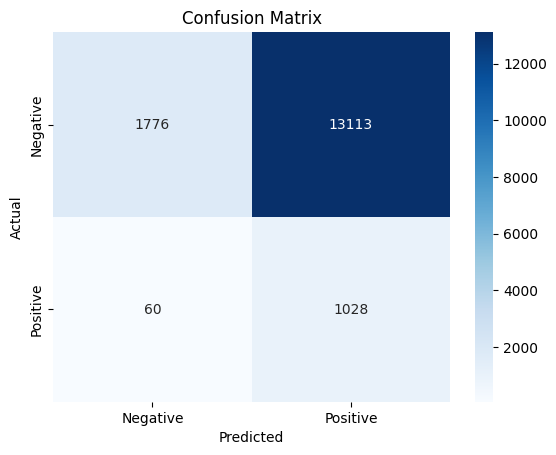

In [25]:
sns.heatmap(confusion_matrix(LR_test, LR_predicted), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()